In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows
pd.set_option('display.max_rows', None)
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,min_salary,max_salary,avg_salary,company,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn
0,Data Scientist,CA$86k-CA$102k (Glassdoor Est.),The Data Scientist is responsible for conducti...,3.1,Canadian National Railway\n3.1,Montreal,-1,10000+ Employees,-1,Company - Public,...,86,102,94.0,Canadian National Railway\n,-1,1,0,0,0,1
1,"Spécialiste, System Design, Data Scientist Mac...",CA$42k-CA$90k (Glassdoor Est.),"Au CN, nous travaillons ensemble pour faire av...",3.1,Canadian National Railway\n3.1,Montreal,-1,10000+ Employees,-1,Company - Public,...,42,90,66.0,Canadian National Railway\n,-1,1,0,1,0,1
2,Senior Data Scientist,CA$92k-CA$130k (Glassdoor Est.),Analytics\nSenior Data Scientist - QuantumBlac...,4.3,QuantumBlack\n4.3,Montreal,-1,501 to 1000 Employees,2009,Company - Private,...,92,130,111.0,QuantumBlack\n,11,1,0,0,0,0
3,R&D Material Scientist,CA$67k-CA$86k (Glassdoor Est.),IKO Industries Ltd. is a market leader in the ...,3.5,IKO Industries Ltd.\n3.5,Brampton,-1,1001 to 5000 Employees,1951,Company - Private,...,67,86,76.5,IKO Industries Ltd.\n,69,0,0,0,0,0
4,"Research Scientist, Multi-Modal AI",CA$138k-CA$169k (Glassdoor Est.),"Title: Research Scientist, Multi-Modal AI\n\nC...",3.8,Samsung Research America\n3.8,Toronto,-1,1001 to 5000 Employees,1988,Subsidiary or Business Segment,...,138,169,153.5,Samsung Research America\n,32,1,0,0,0,0


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company', 'age', 'python_yn',
       'R_yn', 'spark_yn', 'aws_yn', 'excel_yn'],
      dtype='object')

In [5]:
#Feature engineering: simplified job titles
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    elif 'research' in title.lower():
        return 'researcher'
    elif 'business intelligence' or 'bi' in title.lower():
        return 'bi'
    else:
        return 'na'

#Feature engineering: seniortiy
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [6]:
#creating sim
df['simple_title'] = df['Job Title'].apply(title_simplifier)

In [7]:
df.simple_title.value_counts()

data scientist    165
analyst            83
data engineer      27
mle                21
bi                 15
researcher          5
manager             1
Name: simple_title, dtype: int64

In [8]:
#creating seniority column
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        260
senior     57
Name: seniority, dtype: int64

In [9]:
#location counts
df.Location.value_counts()

Toronto          114
Vancouver         50
Montreal          45
Calgary           16
Ottawa            12
North York         7
Mississauga        7
Oakville           6
Markham            6
Winnipeg           4
Cochin             4
Brampton           4
Quebec             4
Saint-Laurent      3
Victoria           3
Halifax            3
Waterloo           3
Edmonton           3
London             2
Kitchener          2
Moncton            2
Pointe-Claire      2
Dorval             2
Surrey             1
Lethbridge         1
Saskatoon          1
Delta              1
Vaughan            1
Charlottetown      1
Chatham            1
Laval              1
Burnaby            1
Venice             1
Regina             1
Guelph             1
Kirkland           1
Name: Location, dtype: int64

In [10]:
#feature engineering length of job description
df['desc_len'] = df['Job Description'].apply(lambda x:len(x))
#df['desc_len']

In [11]:
#remove the new line character at the end of the company data
df['company'] = df.company.apply(lambda x: x.replace('\n',''))

In [12]:
# df['company']

In [13]:
df.describe()

,Rating,Headquarters,Founded,Competitors,min_salary,max_salary,avg_salary,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn,desc_len
count,317.000000,317.0,317.000000,317.0,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.00000,317.000000,317.000000,317.000000
mean,3.443849,-1.0,1415.873817,-1.0,68.823344,91.914826,80.369085,23.678233,0.769716,0.012618,0.29653,0.268139,0.561514,4077.801262
std,1.485670,0.0,901.132787,0.0,19.968972,23.049252,20.571373,37.228476,0.421680,0.111797,0.45745,0.443691,0.496986,1742.981883
min,-1.000000,-1.0,-1.000000,-1.0,31.000000,36.000000,34.000000,-1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,142.000000
25%,3.400000,-1.0,-1.000000,-1.0,53.000000,75.000000,66.000000,-1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2972.000000
50%,3.800000,-1.0,1987.000000,-1.0,70.000000,92.000000,80.500000,11.000000,1.000000,0.000000,0.00000,0.000000,1.000000,3751.000000
75%,4.200000,-1.0,2007.000000,-1.0,80.000000,102.000000,92.000000,28.000000,1.000000,0.000000,1.00000,1.000000,1.000000,4919.000000
max,5.000000,-1.0,2020.000000,-1.0,138.000000,169.000000,153.500000,208.000000,1.000000,1.000000,1.00000,1.000000,1.000000,12028.000000


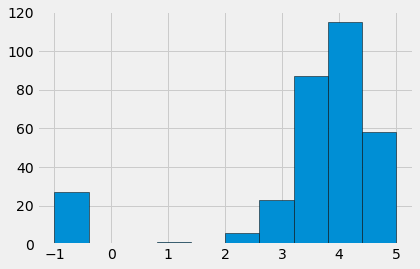

In [14]:
df.Rating.hist(edgecolor = 'black')

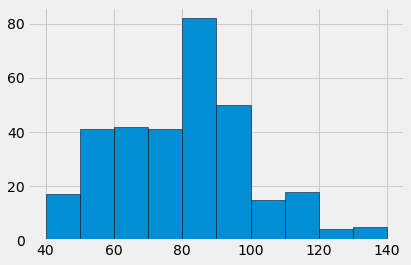

In [15]:
bins = [40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140]
df.avg_salary.hist(edgecolor = 'black', bins = bins)

18.0

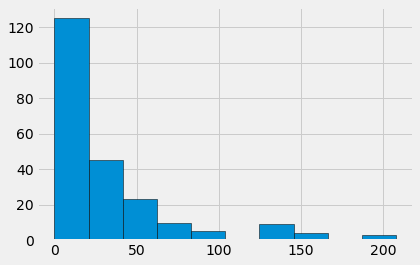

In [16]:
bins = [i for i in range(10,171,10)]
is_age = df['age']!=-1
df_is_age = df[is_age]
# df_is_age.head()
df_is_age.age.hist(edgecolor = 'black')
med = df_is_age['age'].median()
# color = '#fc4f30'
# age_dist.set_xlabel('Age')
# age_dist.set_ylabel('Total Companies')
# age_dist.set_title('Age Frequency Dist')
# plt.axvline(med, color = color, label = 'Age Median')
med

11.0

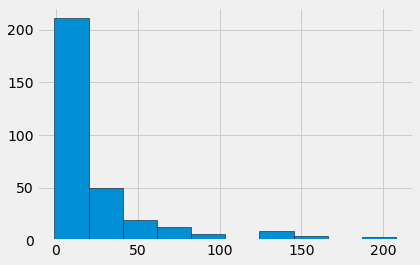

In [17]:
df.age.hist(edgecolor='black')
med = df['age'].median()
med

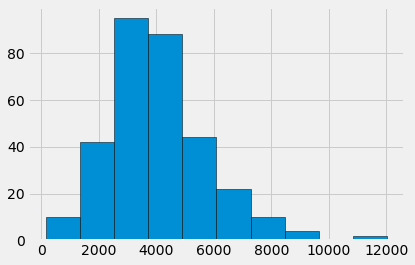

In [18]:
df.desc_len.hist(edgecolor = 'black')

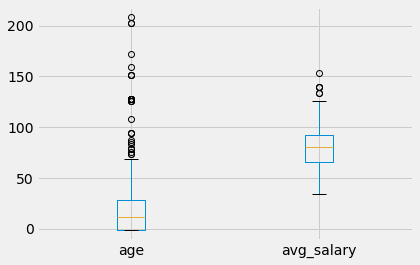

In [19]:
df.boxplot(column = ['age', 'avg_salary'])

In [20]:
df_is_age[['age', 'avg_salary', 'Rating', 'desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.012625,-0.038591,0.231332
avg_salary,0.012625,1.000000,0.164407,0.029024
Rating,-0.038591,0.164407,1.000000,0.127624
desc_len,0.231332,0.029024,0.127624,1.000000


In [21]:
df[['age', 'avg_salary', 'Rating', 'desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.010713,0.173734,0.206380
avg_salary,0.010713,1.000000,0.059809,0.078828
Rating,0.173734,0.059809,1.000000,0.101972
desc_len,0.206380,0.078828,0.101972,1.000000


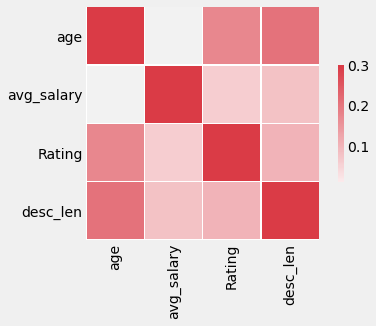

In [22]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [23]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company', 'age', 'python_yn',
       'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'simple_title', 'seniority',
       'desc_len'],
      dtype='object')

In [24]:
df_cat = df[['Location', 'Size','Type of ownership','Sector', 'Revenue','company','python_yn',
       'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'simple_title', 'seniority']]

In [25]:
# for i in df_cat.columns:
#     cat_num = df_cat[i].value_counts()
#     print("graph for %s: total = %d" % (i, len(cat_num)))
#     chart = sns.barplot(x=cat_num.index, y=cat_num)
#     chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
#     plt.show()

graph for Location: total = 20


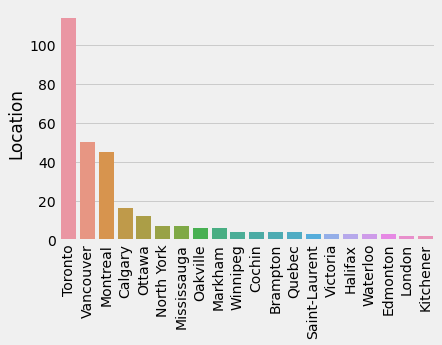

graph for company: total = 20


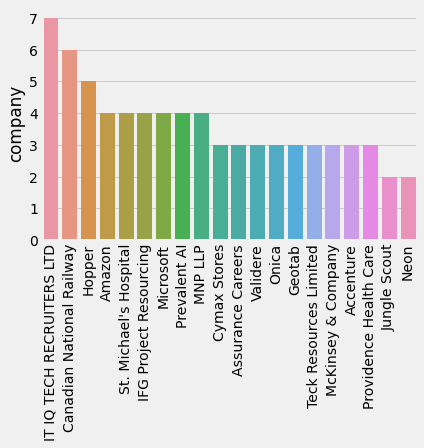

In [26]:
for i in df_cat[['Location','company']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [27]:
#average salary by job title
pd.pivot_table(df, index = 'simple_title', values = 'avg_salary')

,avg_salary
simple_title,
analyst,60.301205
bi,86.033333
data engineer,85.185185
data scientist,88.612121
manager,97.000000
mle,85.333333
researcher,74.300000


In [28]:
#avg salary by job title and seniority
pd.pivot_table(df, index = ['simple_title','seniority'], values = 'avg_salary')

avg_salary
simple_title   seniority            
analyst        na          59.386076
               senior      78.375000
bi             na          86.033333
data engineer  na          82.880000
               senior     114.000000
data scientist na          81.669565
               senior     104.580000
manager        na          97.000000
mle            na          84.225000
               senior     107.500000
researcher     na          74.300000

In [29]:
#top 15 cities by average salrary
df1 = pd.pivot_table(df, index = 'Location', values = 'avg_salary', ).sort_values('avg_salary',ascending = False).head(15)
df2 = pd.pivot_table(df, index = 'Location', values = 'avg_salary', aggfunc = 'count').sort_values('avg_salary',ascending = False).head(15)

pd.concat((df1, df2), axis=1)

,avg_salary,avg_salary
Venice,116.000000,NaN
Cochin,101.125000,4.0
Burnaby,100.000000,NaN
Waterloo,90.666667,3.0
Edmonton,88.500000,3.0
Vaughan,87.500000,NaN
Vancouver,86.350000,50.0
North York,86.285714,7.0
Dorval,85.250000,NaN
Regina,85.000000,NaN


In [30]:
df1 = pd.pivot_table(df, index = ['Location','simple_title'], values = 'avg_salary').sort_values('Location', ascending = False)
df2 = pd.pivot_table(df, index = ['Location','simple_title'], values = 'avg_salary', aggfunc = 'count').sort_values('Location', ascending = False)
pd.concat((df1, df2), axis=1)

avg_salary  avg_salary
Location      simple_title                          
Winnipeg      mle              43.000000           1
              data scientist   65.000000           2
              data engineer    91.500000           1
Waterloo      data scientist   90.666667           3
Victoria      data scientist   83.333333           3
Venice        data scientist  116.000000           1
Vaughan       data scientist   87.500000           1
Vancouver     researcher       70.000000           1
              mle              84.000000           1
              data scientist   94.656250          32
              data engineer    99.750000           2
              bi               93.000000           3
              analyst          59.636364          11
Toronto       data engineer    87.447368          19
              analyst          63.514706          34
              bi               86.285714           7
              data scientist   91.965116          43
              mle              93.111111           9
              researcher      153.500000           1
              manager          97.000000           1
Surrey        analyst          68.000000           1
Saskatoon     data scientist   74.500000           1
Saint-Laurent researcher       45.000000           1
              mle              56.000000           1
              data scientist   56.000000           1
Regina        data scientist   85.000000           1
Quebec        data scientist   79.500000           4
Pointe-Claire data scientist   76.500000           2
Ottawa        data scientist   91.666667           9
              analyst          59.500000           3
Oakville      data scientist   82.625000           4
              analyst          52.500000           2
North York    mle              95.500000           2
              data scientist   82.600000           5
Montreal      researcher       51.500000           2
              data scientist   82.685185          27
              bi               92.000000           2
              analyst          56.000000          12
              data engineer    55.000000           2
Moncton       data scientist   76.500000           2
Mississauga   mle              93.000000           1
              data scientist   84.666667           3
              analyst          61.000000           3
Markham       data scientist   85.500000           1
              mle              87.333333           3
              analyst          65.250000           2
London        data scientist   94.500000           1
              analyst          64.500000           1
Lethbridge    analyst          66.500000           1
Laval         analyst          60.500000           1
Kitchener     analyst          40.500000           1
              bi               92.500000           1
Kirkland      analyst          57.500000           1
Halifax       analyst          50.000000           2
              data engineer    57.500000           1
Guelph        analyst          40.500000           1
Edmonton      mle              83.000000           1
              data scientist   85.000000           1
              data engineer    97.500000           1
Dorval        data scientist   88.000000           1
              data engineer    82.500000           1
Delta         analyst          52.000000           1
Cochin        data scientist  114.833333           3
              analyst          60.000000           1
Chatham       mle              42.000000           1
Charlottetown bi               54.500000           1
Calgary       data scientist   85.875000          12
              analyst          64.125000           4
Burnaby       mle             100.000000           1
Brampton      data scientist   79.750000           2
              bi               76.500000           1
              analyst          54.000000           1

In [31]:
pd.pivot_table(df[df.simple_title == 'data scientist'], index = 'Location', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
Location,
Venice,116.000000
Cochin,114.833333
Vancouver,94.656250
London,94.500000
Toronto,91.965116
Ottawa,91.666667
Waterloo,90.666667
Dorval,88.000000
Vaughan,87.500000


In [32]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company', 'age', 'python_yn',
       'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'simple_title', 'seniority',
       'desc_len'],
      dtype='object')

In [33]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'Type of ownership','avg_salary']]

In [34]:
for i in df_pivots.columns:
    print(i)
    df1 = pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False)
    df2 = pd.pivot_table(df_pivots,index =i, values = 'avg_salary', aggfunc = 'count').sort_values('avg_salary', ascending = False)
    print(pd.concat((df1, df2), axis=1))
    print('')

Rating
        avg_salary  avg_salary
Rating                        
-1.0     78.703704          27
 1.0     54.000000           1
 2.0     67.000000           3
 2.4     85.500000           1
 2.5    103.000000           2
 2.6     54.500000           6
 2.7     71.833333           3
 2.8     65.000000           1
 2.9     63.500000           2
 3.0     68.000000           2
 3.1     85.000000           9
 3.2     78.346154          13
 3.3     78.812500           8
 3.4     73.750000          20
 3.5     83.933333          15
 3.6     82.931818          22
 3.7     86.333333           9
 3.8     76.566667          15
 3.9     81.052632          19
 4.0     81.803030          33
 4.1     96.450000          20
 4.2     89.100000          10
 4.3     83.777778          18
 4.4     80.100000          15
 4.5     75.875000           8
 4.6     77.200000           5
 4.7     65.000000           3
 4.8     78.000000           7
 4.9     57.500000           1
 5.0     77.710526          19



ValueError: Grouper for 'avg_salary' not 1-dimensional